In [19]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Errores
import warnings
warnings.filterwarnings('ignore')

In [20]:
df_casual = pd.read_pickle('../datos_finales/archivo_casual_est.pkl')
df_casual.head(2)

,estacion,año,mes,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,usuarios_casuales
0,invierno,2018,Enero,Lunes,festivo,nuboso,-0.486274,0.855582,-0.208909,331
1,invierno,2018,Enero,Martes,laborable,nuboso,-0.425690,0.332722,0.687550,131


In [21]:
df_registrados = pd.read_pickle('../datos_finales/archivo_registrados_est.pkl')
df_registrados.head(2)

,estacion,año,mes,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,usuarios_registrados
0,invierno,2018,Enero,Lunes,festivo,nuboso,-0.486274,0.855582,-0.208909,654
1,invierno,2018,Enero,Martes,laborable,nuboso,-0.425690,0.332722,0.687550,670


In [22]:
df_total = pd.read_pickle('../datos_finales/archivo_total_est.pkl')
df_total.head(2)

,estacion,año,mes,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,total_usuarios
0,invierno,2018,Enero,Lunes,festivo,nuboso,-0.486274,0.855582,-0.208909,985
1,invierno,2018,Enero,Martes,laborable,nuboso,-0.425690,0.332722,0.687550,801


In [23]:
categoricas = df_total.select_dtypes(include = 'O')
categoricas['año'] = df_total['año']
categoricas

,estacion,mes,dia_semana,dias_laborables,tiempo,año
0,invierno,Enero,Lunes,festivo,nuboso,2018
1,invierno,Enero,Martes,laborable,nuboso,2018
2,invierno,Enero,Miercoles,laborable,despejado,2018
3,invierno,Enero,Jueves,laborable,despejado,2018
4,invierno,Enero,Viernes,laborable,despejado,2018
...,...,...,...,...,...,...
725,invierno,Diciembre,Viernes,laborable,nuboso,2019
726,invierno,Diciembre,Domingo,fin de semana,nuboso,2019
727,invierno,Diciembre,Sabado,fin de semana,nuboso,2019
728,invierno,Diciembre,Lunes,laborable,despejado,2019


### Usuarios totales:

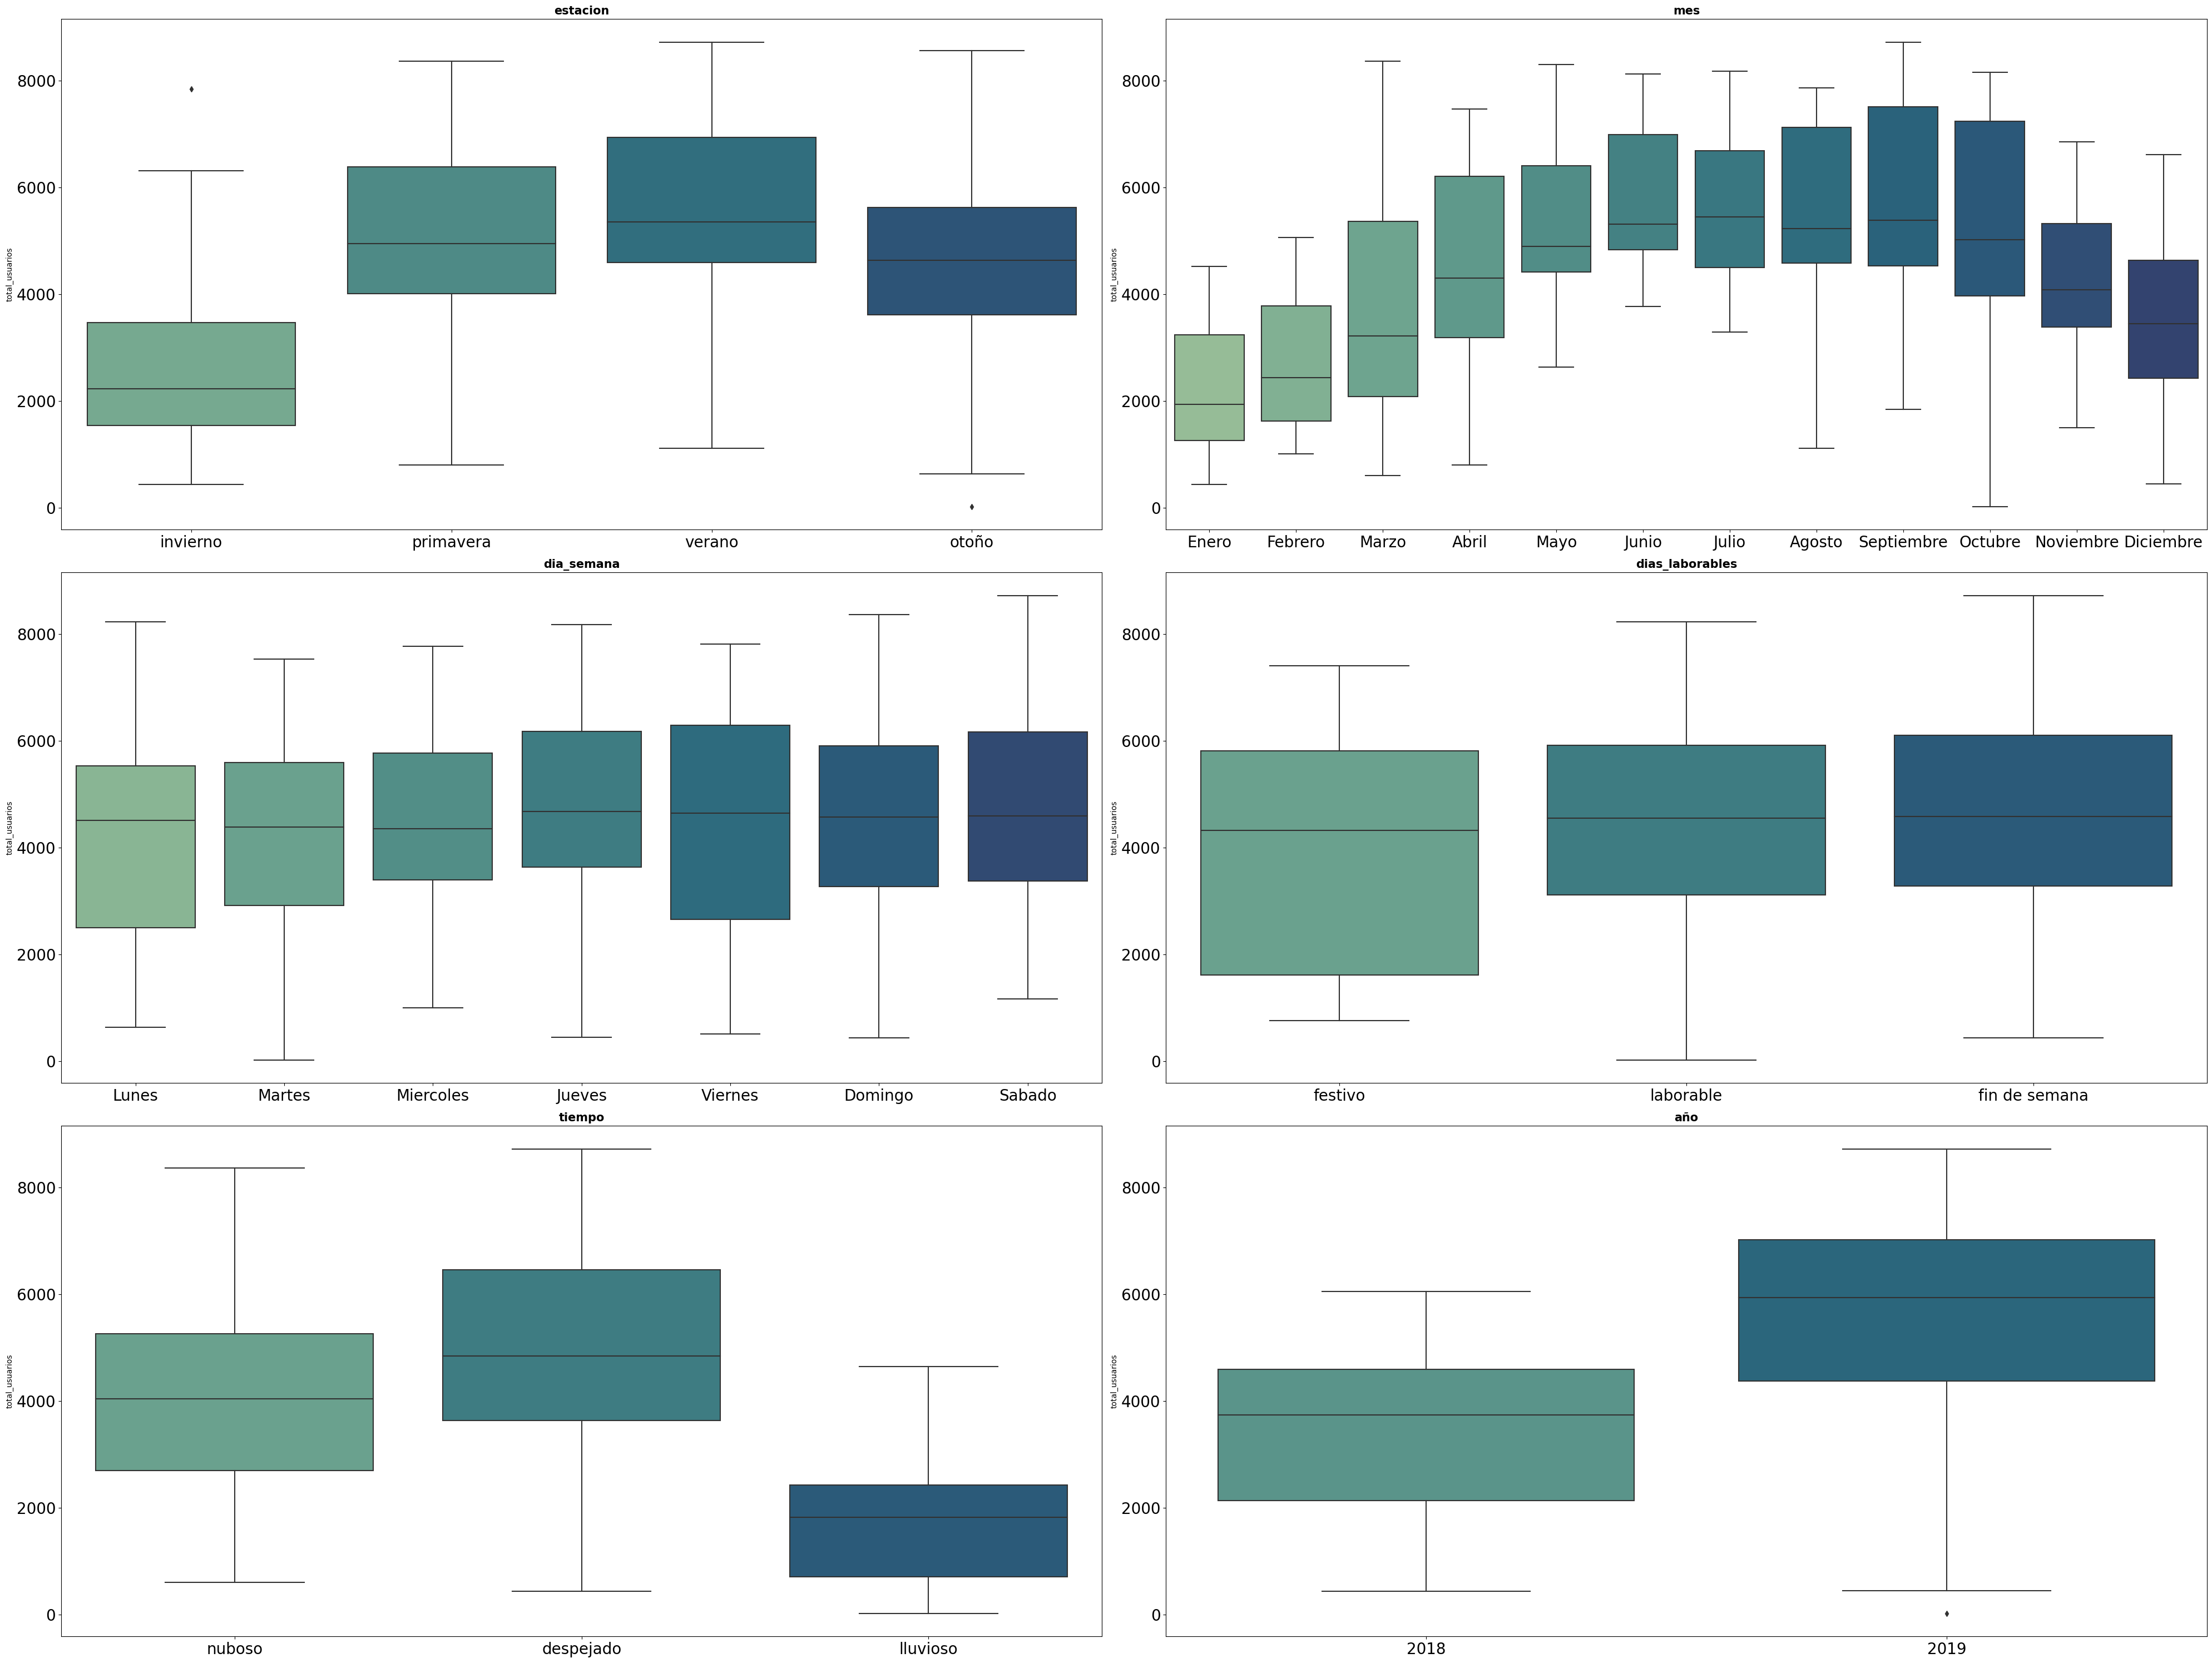

In [24]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (40, 30))

columnas_categoricas = categoricas.columns

axes = axes.flat

for i, colum in enumerate(columnas_categoricas): 
    sns.boxplot(y= 'total_usuarios', x= colum, data= df_total, palette= 'crest', ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

Como podemos comprobar en la visualización todas tienen orden menos las variables dia_semana y dias_laborables. 

Comenzamos por las que no tienen orden:

In [25]:
def getdummies(dataframe,columna):
    """
    Esta función aplica el método getdummies.
    Args:
        dataframe (dataframe): el dataframe donde se encuentra la columna que queremos modificar.
        columna (str): columna a la que queremos aplicar el método.
    Returns: None
    """
    df_dum = pd.get_dummies(dataframe[columna], prefix_sep = "_", prefix = 'cat', dtype = int)
    dataframe[df_dum.columns] = df_dum
    dataframe.drop(columna, axis = 1, inplace=True)

In [26]:
getdummies(df_total,'dia_semana')
getdummies(df_total,'dias_laborables')

Seguimos con las que tienen orden:

In [27]:
def aplicar_map(dataframe,columna,diccionario):
    """
    Esta función aplica el método map.
    Args:
        dataframe (dataframe): el dataframe donde se encuentra la columna que queremos modificar.
        columna (str): columna a la que queremos aplicar el método.
        diccionario (dicc): diccionario con el orden que hemos establecido para las subcategorias. 
    Returns: None
    """
    dataframe[columna] = dataframe[columna].map(diccionario)

In [28]:
mapa_estacion= {'invierno':1, 'primavera':2.5, 'verano':3, 'otoño':2}
mapa_mes ={'Enero':1, 'Febrero':2, 'Marzo':3, 'Abril':4, 'Mayo':5, 'Junio':6, 'Julio':6.5,
       'Agosto':6, 'Septiembre':6.5, 'Octubre':5, 'Noviembre':4, 'Diciembre':3.5}
mapa_tiempo ={'nuboso':2, 'despejado':2.5, 'lluvioso':1}
mapa_año = {2018:1,2019:2}

In [29]:
aplicar_map(df_total,'estacion',mapa_estacion)
aplicar_map(df_total,'mes',mapa_mes)
aplicar_map(df_total,'tiempo',mapa_tiempo)
aplicar_map(df_total,'año',mapa_año)

- Guardamos el archivo

In [30]:
df_total.to_pickle('../datos_finales/archivo_total_est_enc.pkl')

### Usuarios casuales:

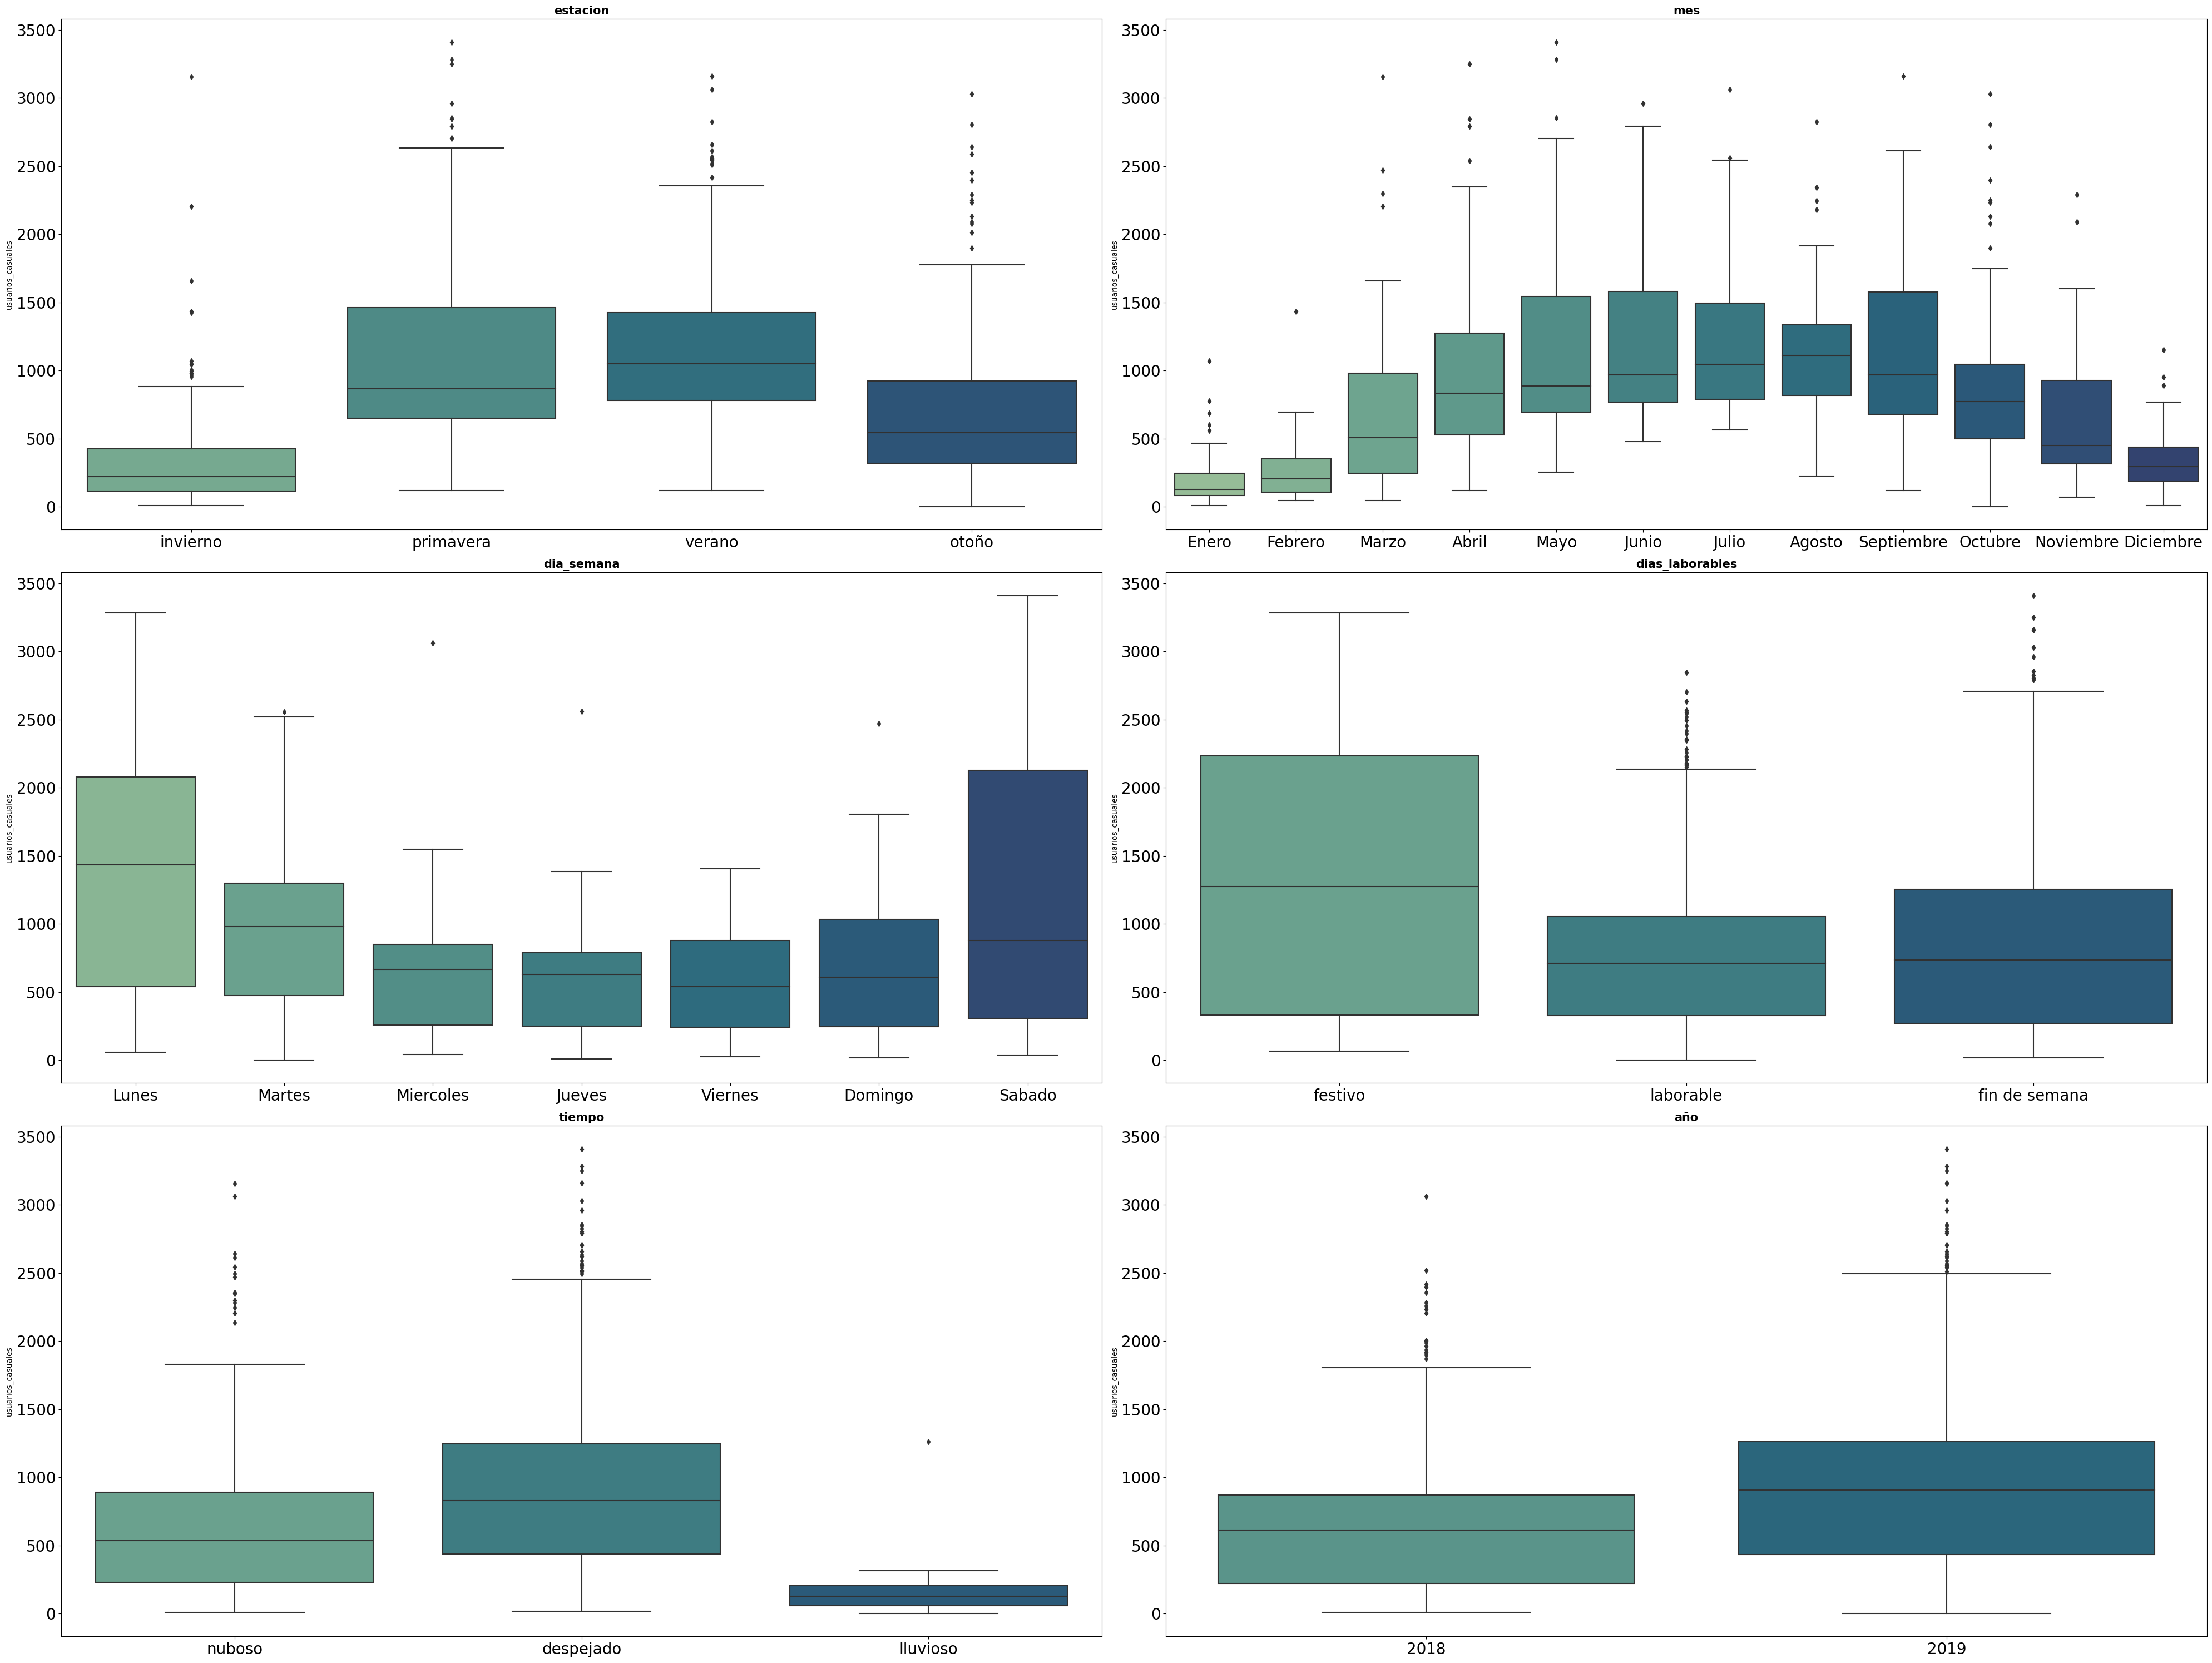

In [31]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (40, 30))

columnas_categoricas = categoricas.columns

axes = axes.flat

for i, colum in enumerate(columnas_categoricas): 
    sns.boxplot(y= 'usuarios_casuales', x= colum, data= df_casual, palette= 'crest', ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

Consideramos que todas nuestras variables categóricas tienen orden menos año. 

Comenzamos por las que tienen orden:

In [32]:
mapa_estacion= {'invierno':1, 'primavera':3, 'verano':3.5, 'otoño':2}
mapa_mes ={'Enero':1, 'Febrero':2, 'Marzo':3, 'Abril':4, 'Mayo':5, 'Junio':6, 'Julio':6.5,
       'Agosto':6, 'Septiembre':6.5, 'Octubre':5, 'Noviembre':4, 'Diciembre':3.5}
mapa_tiempo ={'nuboso':2, 'despejado':2.5, 'lluvioso':1}
# mapa_año = {2018:1,2019:2}
mapa_dia_semana = {'Lunes':3, 'Martes':2.5, 'Miercoles':1.5, 'Jueves':1.5, 'Viernes':1, 'Domingo':1.5,
       'Sabado':2}
mapa_dias_laborables = {'festivo':2, 'laborable':1, 'fin de semana':1}

In [33]:
aplicar_map(df_casual,'estacion',mapa_estacion)
aplicar_map(df_casual,'mes',mapa_mes)
aplicar_map(df_casual,'tiempo',mapa_tiempo)
aplicar_map(df_casual,'dia_semana',mapa_dia_semana)
aplicar_map(df_casual,'dias_laborables',mapa_dias_laborables)

Continuamos por las que no tienen orden:

In [34]:
getdummies(df_casual,'año')

- Guardamos el archivo:

In [35]:
df_casual.to_pickle('../datos_finales/archivo_casual_est_enc.pkl')

### Usuarios registrados:

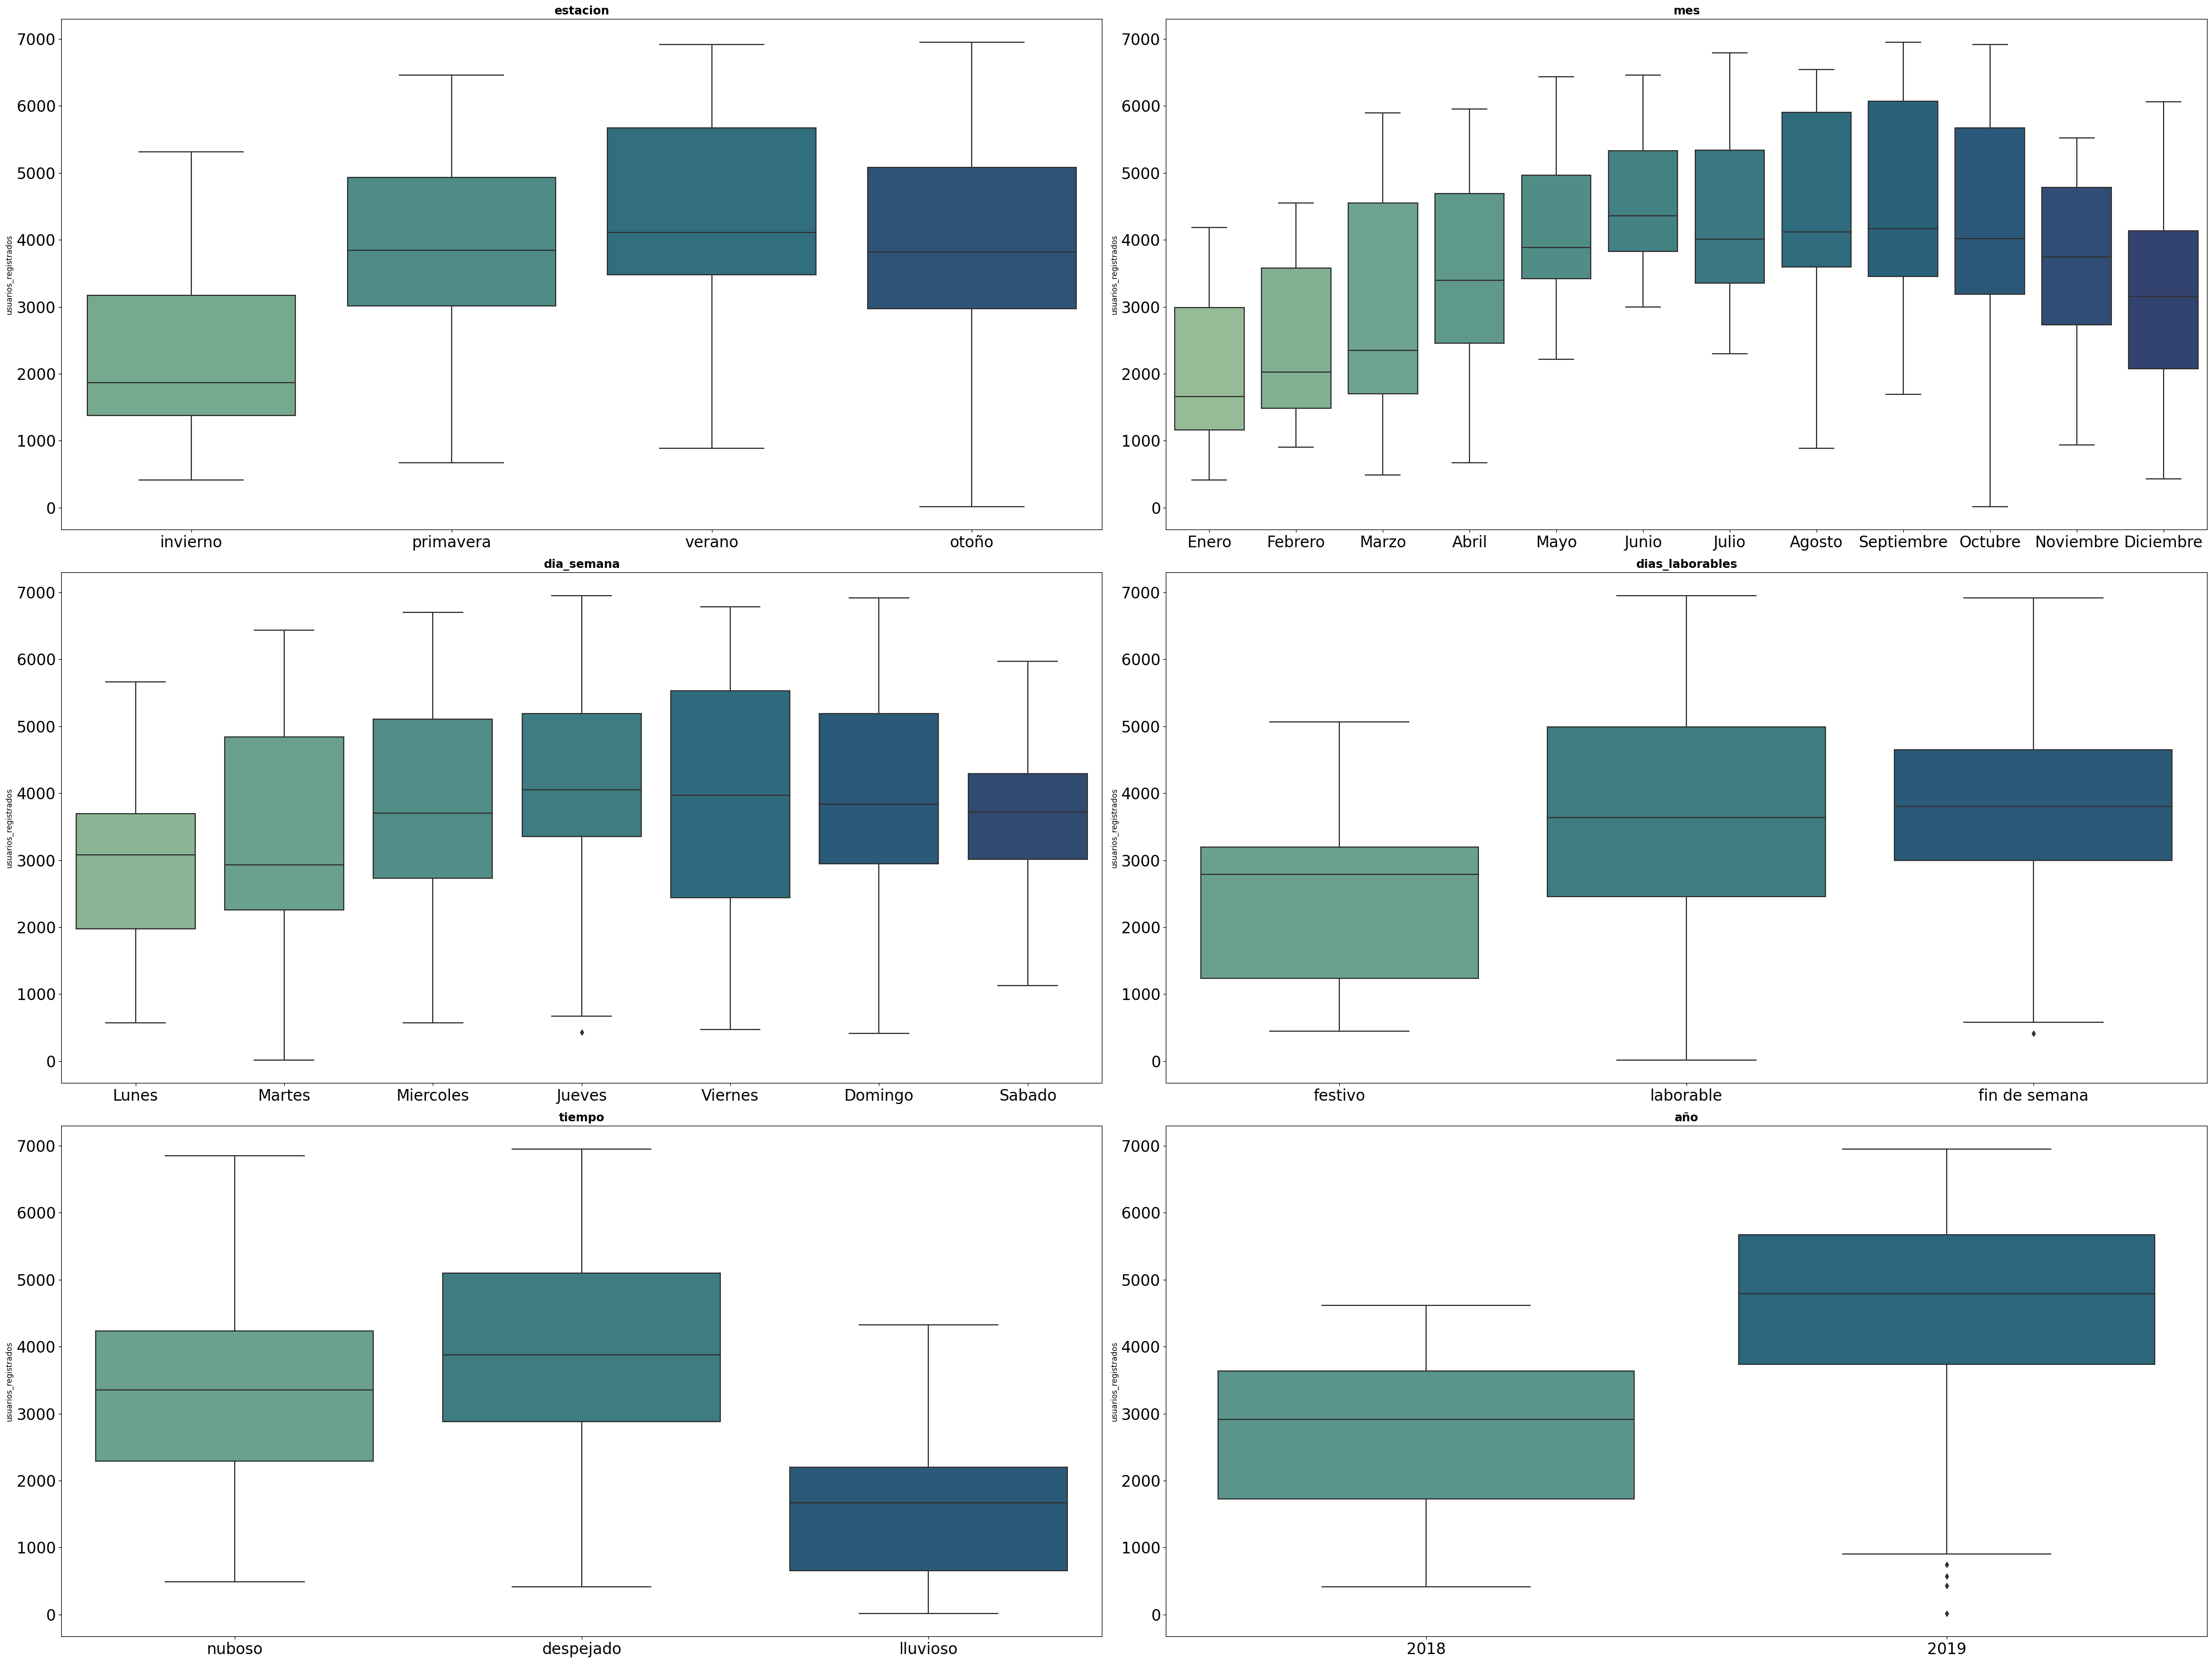

In [36]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (40, 30))

columnas_categoricas = categoricas.columns

axes = axes.flat

for i, colum in enumerate(columnas_categoricas): 
    sns.boxplot(y= 'usuarios_registrados', x= colum, data= df_registrados, palette= 'crest', ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

Consideramos que todas nuestras variables categóricas tienen orden menos dia_semana. 

Comenzamos por las que tienen orden:

In [37]:
mapa_estacion= {'invierno':1, 'primavera':2, 'verano':2.5, 'otoño':2}
mapa_mes ={'Enero':1, 'Febrero':2, 'Marzo':3, 'Abril':4, 'Mayo':5, 'Junio':6, 'Julio':6.5,
       'Agosto':6, 'Septiembre':6.5, 'Octubre':5, 'Noviembre':4, 'Diciembre':3.5}
mapa_tiempo ={'nuboso':2, 'despejado':2.5, 'lluvioso':1}
mapa_año = {2018:1,2019:2}
mapa_dias_laborables = {'festivo':1, 'laborable':2, 'fin de semana':2}

In [38]:
aplicar_map(df_registrados,'estacion',mapa_estacion)
aplicar_map(df_registrados,'mes',mapa_mes)
aplicar_map(df_registrados,'tiempo',mapa_tiempo)
aplicar_map(df_registrados,'año',mapa_año)
aplicar_map(df_registrados,'dias_laborables',mapa_dias_laborables)

Continuamos por los que no tienen orden:

In [39]:
getdummies(df_registrados,'dia_semana')

- Guardamos el archivo

In [40]:
df_registrados.to_pickle('../datos_finales/archivo_registrados_est_enc.pkl')